Black Scholes Equation:

$V(S, t)$: Price of option (we will be using call options) <br>
$S(t)$: Underlying stock Price<br>
$t$: Time<br>
$\sigma$: Volitility<br>
$r$: Risk Free Interest Rate <br>
$T$: Final time/Option maturity

$ \begin{align} \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0 \end{align}$

With Boundary conditons that describe a call option:
$\begin{align}
  V(0, t) &= 0\text{ for all }t \\
  V(S, t) & \sim S - K e^{-r(T-t)}\text{ as }S \rightarrow \infty \\
  V(S, T) &= \max\{S - K, 0\}
\end{align}$

General Reference for Black Scholes Equation and Boundary Conditions: https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_equation

These boundary conditions were observed by Fischer Black and Myron Scholes in their paper describing this model: https://www.cs.princeton.edu/courses/archive/fall09/cos323/papers/black_scholes73.pdf


Difference quotients for FDM:

$$
\frac{\partial V}{\partial t}(S, t) \approx \frac{1}{k}(V(S, t + k)-V(S, t))
$$

$$
\frac{\partial V}{\partial S}(S, t) \approx \frac{1}{2h}(V(S + h, t)-V(S - h, t))
$$

$$
\frac{\partial^2 V}{\partial S^2}(S, t) \approx \frac{1}{h^2}(V(S+h, t)-2 V(S, t)+V(S-h, t))
$$

Then, we can discritize these to create our method:

$$
\frac{1}{k}\left(w_{i ,j+1}-w_{i, j}\right) + S\frac{\sigma^2}{2h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) + rS\frac{1}{2h}\left(w_{i + 1, j}-w_{i - 1, j}\right) - rw_{i, j} = 0
$$

$$
w_{i, j+1} = k(-S\frac{\sigma^2}{2h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) - rS\frac{1}{2h}\left(w_{i + 1, j}-w_{i - 1, j}\right) + rw_{i, j}) + w_{i j}
$$

$$
w_{i, j+1} = -kS\frac{\sigma^2}{2h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) - krS\frac{1}{2h}\left(w_{i + 1, j}-w_{i - 1, j}\right) + krw_{i, j} + w_{i j}
$$

$$
w_{i, j+1} = -kS\frac{\sigma^2}{2h^2}w_{i+1, j} +kS\frac{\sigma^2}{h^2}w_{i j} - kS\frac{\sigma^2}{2h^2}w_{i-1, j} - krS\frac{1}{2h}w_{i + 1, j}+krS\frac{1}{2h}w_{i - 1, j} + krw_{i, j} + w_{i j}
$$

$$
w_{i, j+1} = (-kS\frac{\sigma^2}{2h^2} - krS\frac{1}{2h})w_{i+1, j} + (1 + kr+kS\frac{\sigma^2}{h^2})w_{i, j} + (-kS\frac{\sigma^2}{2h^2} + krS\frac{1}{2h})w_{i-1, j}
$$

Then, let
$$
\delta_i = kS_i^2\frac{\sigma^2}{2h^2} \\
\rho = kr \\
\phi_i = krS_i\frac{1}{2h} \\
$$

$$
w_{i, j+1} = (-\delta_i - \phi_i)w_{i+1, j} + (1 + \rho+2\delta_i)w_{i, j} + (-\delta_i + \phi_i)w_{i-1, j}
$$

In matrix form, this reads, 
$$
\left[\begin{array}{c}
w_{1, j+1} \\
\vdots \\
w_{m, j+1}
\end{array}\right]=\left[\begin{array}{ccccc}
1 + \rho+2\delta_1 & -\delta_1 - \phi_1 & 0 & \cdots & 0 \\
-\delta_2 + \phi_2 & 1 + \rho+2\delta_2 & -\delta_2 - \phi_2 & \ddots & \vdots \\
0 & -\delta_3 + \phi_3 & 1 + \rho+2\delta_3 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & -\delta_{m-1} - \phi \\
0 & \cdots & 0 & -\delta_m + \phi & 1 + \rho+2\delta_m
\end{array}\right]\left[\begin{array}{c}
w_{1 j} \\
\vdots \\
w_{m j}
\end{array}\right]+\left[\begin{array}{c}
(-\delta_1 + \phi_1) w_{0, j} \\
0 \\
\vdots \\
0 \\
(-\delta_{m} - \phi_m) w_{m+1, j}
\end{array}\right]
$$

However, our goal is to find the option price overtime, given that we know the option price distribution at maturity. This is given by the boundary condtion $C(S, T) = \max\{S - K, 0\}$.

So, Our typical forward difference method may not work (it can be used, but is implicit).

Idea: Use backward difference quotient with respect to time, as we know the future values but not the present,
$$
\frac{\partial V}{\partial t}(S, t) \approx \frac{1}{k}(V(S, t)-V(S, t - k))
$$
and solve for $V(S, t - h)$.

https://math.nyu.edu/~goodman/teaching/DerivSec10/notes/week7.pdf gives justification for the use of the backwards difference to create an explicit method.


**Stencil** (Backward differnece method)

![Stencil for backward Euler time discretization](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Implicit_method-stencil.svg/1920px-Implicit_method-stencil.svg.png)

Figure: Wikipedia (Stencil of backward difference method)

The figure uses different index from us. Substitute:

- $n\gets j-1$
- $j\gets i$

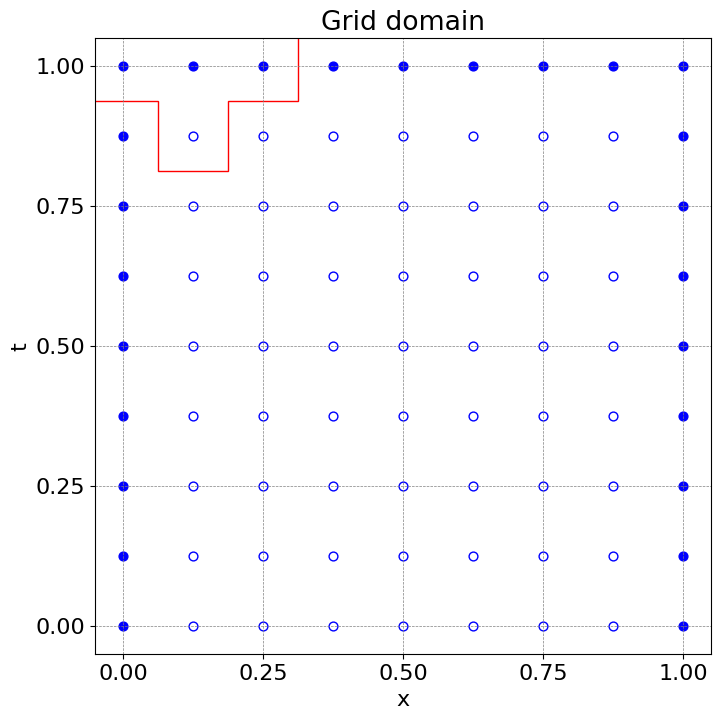

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(8, 8))

L = 1
T = 1
N = 8
K = 8
h = L/N
k = T/K

x = np.linspace(0, L, N+1)
t = np.linspace(0, L, N+1)
xx, tt = np.meshgrid(x, t)

# grid domain
gd = np.zeros((N+1, N+1))

gd[-1, :] = 1
# gd[-1, :] = 1
gd[:, 0] = 1
gd[:, -1] = 1



ax.scatter(xx[gd==0], tt[gd==0], c='w', edgecolors='b', s=40)
ax.scatter(xx[gd==1], tt[gd==1], c='b', s=40)
ax.set_aspect('equal')
ax.set_xticks(x[::2])
ax.set_yticks(t[::2])
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

#%% Add a stencil polygon
polygon_points = np.array([[-0.5*h, 8.5*k], [2.5*h, 8.5*k], 
        [2.5*h, 7.5*k],  [1.5*h, 7.5*k], [1.5*h, 6.5*k],
        [0.5*h, 6.5*k], [0.5*h, 7.5*k], [-0.5*h, 7.5*k]])
ax.add_patch(plt.Polygon(polygon_points, closed=True, fill=None, edgecolor='r'))

ax.set_title('Grid domain')
plt.show()

Then, our discrete equation becomes
$$
\frac{1}{k}\left(w_{i ,j}-w_{i, j - 1}\right) + S_i^2\frac{\sigma^2}{2h^2}\left(w_{i+1, j}-2 w_{i j}+w_{i-1, j}\right) + rS_i\frac{1}{2h}\left(w_{i + 1, j}-w_{i - 1, j}\right) - rw_{i, j} = 0
$$

$$
w_{i, j-1} = (kS_i^2\frac{\sigma^2}{2h^2} + krS_i\frac{1}{2h})w_{i+1, j} + (1 - kr-kS_i^2\frac{\sigma^2}{h^2})w_{i, j} + (kS_i^2\frac{\sigma^2}{2h^2} - krS_i\frac{1}{2h})w_{i-1, j}
$$

Note: this is an explicit solution, as the future values of our Option price are know, even though we used the backwards difference quotient.

Using, let
$$
\delta_i = kS_i^2\frac{\sigma^2}{2h^2} \\
\rho = kr \\
\phi_i = krS_i\frac{1}{2h} \\
$$

In matrix form, this reads, 
$$
\left[\begin{array}{c}
w_{1, j-1} \\
\vdots \\
w_{m, j-1}
\end{array}\right]=\left[\begin{array}{ccccc}
1- \rho-2\delta_1 & \delta_1 + \phi_1 & 0 & \cdots & 0 \\
\delta_2 - \phi_2 & 1 - \rho-2\delta_2 & \delta_2 + \phi_2 & \ddots & \vdots \\
0 & \delta_3 - \phi_3 & 1 - \rho-2\delta_3 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \delta_{m-1} + \phi_{m-1} \\
0 & \cdots & 0 & \delta_m - \phi_m & 1 - \rho-2\delta_m
\end{array}\right]\left[\begin{array}{c}
w_{1 j} \\
\vdots \\
w_{m j}
\end{array}\right]+\left[\begin{array}{c}
(\delta_1 - \phi_1) w_{0, j} \\
0 \\
\vdots \\
0 \\
(\delta_{m} + \phi_{m}) w_{m+1, j}
\end{array}\right]
$$

A stability analysis of this matrix can be done, including finding its eiganvalues, to determine when a set of conditions creates a stable result. 

In [15]:
import numpy as np
from scipy.stats import norm

def solve_fdm_option_backwards(w, par):
    """
    Return the next time of the option price using backwards difference method (but this is an explicit method).
    
    Input:
        w: (1D array) Option price distribution at current.
        par: (dict) Parameter for the method.
    Output:
        w_new: (1D array) Option price distribution one time step backwards.
    """
    w_new = np.zeros_like(w[1:-1])

    # Main line of the difference method described above:
    w_new = (1 -par['k']*par['r'])*w[1:-1] \
        + par['S']*par['S']*par['k']*(par['sig']*par['sig'])/(2*(par['h']*par['h']))*(w[2:] - 2.*w[1:-1] + w[:-2]) \
        + par['k']*par['r']* par['S']*1/(2*par['h'])*(w[2:] - w[:-2])
    
    return w_new

In [16]:
def solve_call_price_backwards(ic, bc1, bc2, sig, r, a, b, T, N, K):
    """
    Return numerical solution of Option Price with Backwards difference method.
    
    Input:
        ic: (1D array) Option Price distribution at t = T.
        bc1: (float or 1D array) Boundary condition at S=0. Constant boundary condition is assumed.
        bc2: (float or 1D array) Boundary condition at S= S-PV(K) (large S).
        sig: volitility
        r: risk free rate
        a: (float) Left boundary.
        b: (float) Right boundary.
        T: (float) Final time.
        N: (int) Number of spatial grid points.
        K: (int) Number of time grid points.
    Output:
        w: (2D array) Numerical solution.
    """
    w = np.zeros((N+2, K+1))
    h = (b-a)/(N+1)
    k = T/K
    par = {'sig': sig, 'r': r, 'h': h, 'k': k, 'S': np.linspace(h, b, N, endpoint = False)}
    # Initial/boundary condition
    w[:, K] = ic
    w[0, :] = bc1
    w[-1, :] = bc2

    # time marching
    for j in range(K, 0, -1):
        w[1:-1, j-1] = solve_fdm_option_backwards(w[:,j], par)

    return w

In [17]:
strike = 100
#Stable conditons, strike = 100, N = 49 (49 divides creates integer step size which makes nice visualization), K = 100 (all K stable), a = 0, b = 200, T = 1, sig = 0.2, r = 0.05
N = 49 
K = 50
a = 0
b = 200
T = 0.25
sig = 0.2
r = 0.05
bc1 = 0
bc2 = b - strike*np.e**(-r*(T - (np.arange(0, T + T/K, T/K))))
f = np.vectorize(lambda S, strike: max((S - strike), 0.))
ic = f(np.arange(0,b + b/(N + 1), b/(N + 1)), strike)
h = (b-a)/(N+1)
k = T/K

In [18]:
w = solve_call_price_backwards(ic, bc1, bc2, sig, r, a, b, T, N, K) #Approximate Solution

#True Solution
S = np.arange(h, b + h, h)
sol = np.zeros((N + 2, K + 1))
for j in range(0, K):
    d1 = (np.log(S/strike) + (r + sig*sig/2)*(T-j*k))/(sig*np.sqrt(T - j*k))
    d2 = d1 - sig*np.sqrt(T - j*k)
    sol[1:,j] = norm.cdf(d1)*S - norm.cdf(d2)*strike*np.exp(-r*(T - j*k))
sol[1:, K] = f(S, strike)

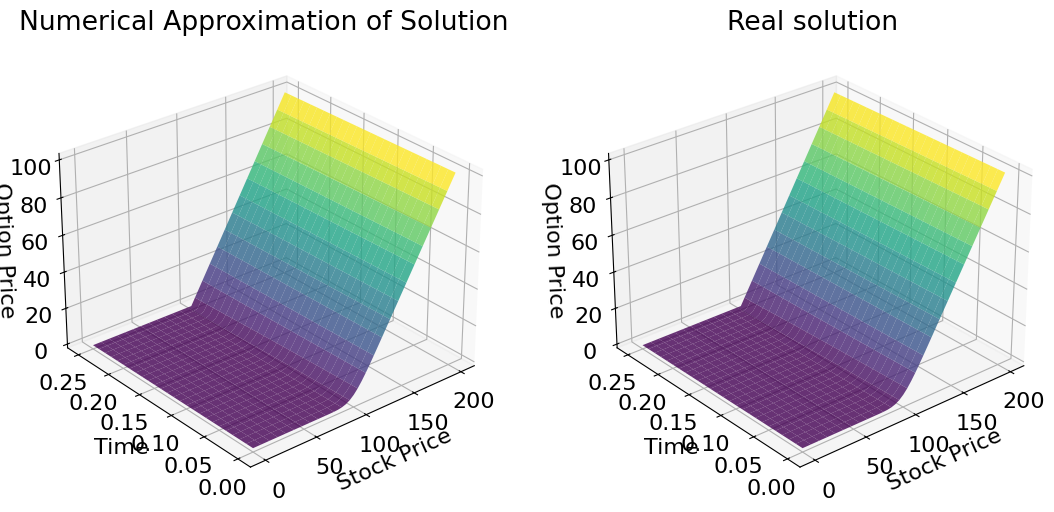

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(13, 6.5), subplot_kw={'projection':'3d'})

x = np.linspace(a, b, N+2)
t = np.linspace(0, T, K+1)


ax[0].plot_surface(x.reshape(-1,1), t, w, cmap='viridis', alpha=0.8)
ax[0].set_title('Numerical Approximation of Solution')

ax[1].plot_surface(x.reshape(-1,1), t, sol, cmap='viridis', alpha=0.8)
ax[1].set_title('Real solution')

# Change the angle of projection
for j in range(len(ax)):
    ax[j].set_xlabel('Stock Price')
    ax[j].set_ylabel('Time')
    ax[j].set_zlabel('Option Price')
    ax[j].view_init(elev=28, azim=230)

plt.show()

In [20]:
error = w[:,0] - sol[:, 0]
print(f"Average error in Option price at time 0: {sum(abs(error))/(np.size(error) - 1)}")

Average error in Option price at time 0: 0.00701962896949582


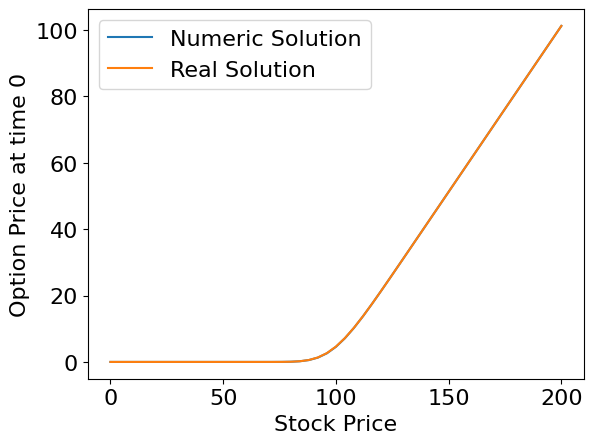

In [21]:
fig, ax = plt.subplots()
ax.plot(x, w[:,0], label = "Numeric Solution")
ax.plot(x, sol[:,0], label = "Real Solution")
ax.set_xlabel("Stock Price")
ax.set_ylabel("Option Price at time 0")
ax.legend()
plt.show()

The following graph shows the option payoff at time T of a 100 strike call option. This is used as our "initial" condition in our numerical method.

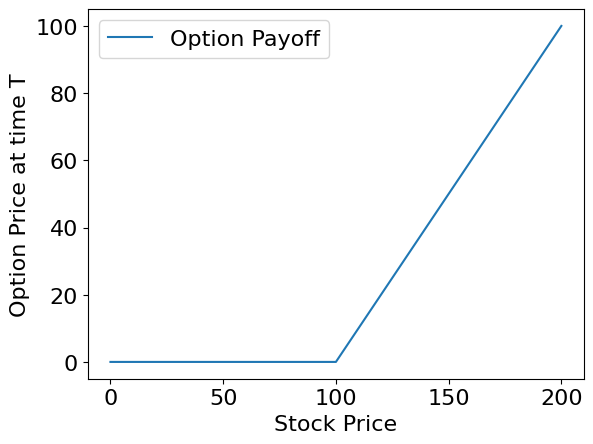

In [22]:
fig, ax = plt.subplots()
ax.plot(x, ic, label = "Option Payoff")
ax.set_xlabel("Stock Price")
ax.set_ylabel("Option Price at time T")
ax.legend()
plt.show()

Testing average error at time 0 for different step sizes:

In [23]:
strike = 100
#Stable conditons, strike = 100, N = 50 (Unstable for values > 80), K = 100 (all K stable), a = 0, b = 200, T = 1, sig = 0.2, r = 0.05
a = 0
b = 200
T = 0.25
sig = 0.2
r = 0.05
bc1 = 0
bc2 = b - strike*np.e**(-r*(T - (np.arange(0, T + T/K, T/K))))
f = np.vectorize(lambda S, strike: max((S - strike), 0.))
ic = f(np.arange(0,b + b/(N + 1), b/(N + 1)), strike)
h = (b-a)/(N+1)
k = T/K

error = np.zeros((8,8))

numSpacialSteps = np.array([1, 2, 3, 4, 5, 10, 20, 50])
numTimeSteps = np.array([1, 2, 3, 4, 5, 10, 20, 50])


for i in range(8):
    N = numSpacialSteps[i]
    h = (b-a)/(N+1)
    S = np.linspace(h, b, N, endpoint = False)
    d1 = (np.log(S/strike) + (r + sig*sig/2)*(T))/(sig*np.sqrt(T))
    d2 = d1 - sig*np.sqrt(T)
    sol = norm.cdf(d1)*S - norm.cdf(d2)*strike*np.exp(-r*(T))
    for j in range(8):
        K = numTimeSteps[j]
        bc2 = b - strike*np.e**(-r*(T - (np.arange(0, T + T/K, T/K))))
        f = np.vectorize(lambda S, strike: max((S - strike), 0.))
        ic = f(np.arange(0,b + b/(N + 1), b/(N + 1)), strike)
        w = solve_call_price_backwards(ic, bc1, bc2, sig, r, a, b, T, N, K)
        errorArray = w[1:numSpacialSteps[i] + 1,0] - sol
        error[i, j] = sum(abs(errorArray))/np.size(errorArray)
    

In this dataframe, changing the number of spacial steps is represented by the rows and the number of time steps is represented by the columns

In [24]:
import pandas as pd
errorDataframe = pd.DataFrame(data = error,  
                        index = ["1", "2", "3", "4", "5", "10", "20", "50"],  
                        columns = ["1", "2", "3", "4", "5", "10", "20", "50"])
errorDataframe

,1,2,3,4,5,10,20,50
1,3.489997,3.492821,3.493754,3.494219,3.494498,3.495054,3.495332,3.495498
2,0.314174,0.310799,0.309696,0.309149,0.308822,0.308171,0.307847,0.307652
3,0.999246,1.003991,1.005523,1.006280,1.006732,1.007629,1.008074,1.008341
4,0.257041,0.254449,0.253576,0.253138,0.252876,0.252349,0.252086,0.251928
5,0.500257,0.511398,0.514873,0.516568,0.517572,0.519550,0.520525,0.521106
10,0.080673,0.075104,0.074270,0.073857,0.073611,0.073121,0.072877,0.072732
20,0.094794,0.028464,0.020738,0.020148,0.019908,0.019430,0.019192,0.019050
50,0.259814,0.274056,0.245719,0.164834,0.082952,0.020756,0.003354,0.003215


Finanally, we test K = 500 and N = 200

In [25]:
N = 200
K = 500
h = (b-a)/(N+1)
S = np.linspace(h, b, N, endpoint = False)
d1 = (np.log(S/strike) + (r + sig*sig/2)*(T))/(sig*np.sqrt(T))
d2 = d1 - sig*np.sqrt(T)
sol = norm.cdf(d1)*S - norm.cdf(d2)*strike*np.exp(-r*(T))

bc2 = b - strike*np.e**(-r*(T - (np.arange(0, T + T/K, T/K))))
f = np.vectorize(lambda S, strike: max((S - strike), 0.))
ic = f(np.arange(0,b + b/(N + 1), b/(N + 1)), strike)
w = solve_call_price_backwards(ic, bc1, bc2, sig, r, a, b, T, N, K)

errorArray = w[1:N + 1,0] - sol
error = sum(abs(errorArray))/np.size(errorArray)
error

0.0002071622045669884

Increasing the number of spacial steps has a very larger effect on error. Increasing the number of time steps has less effect on the error. There is a risk of instablility, however large values for K and N can still be create stable solutions. The "rule" that we found to work while testing with the parameters we chose, is to set K = N^2. This has no rigourous proof, just that it produced stable results during limited testing.